In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import img_to_array
import pandas as neha
import numpy as np
from PIL import Image
from tqdm import tqdm
from google.colab import files 
import io
import cv2
import os
import matplotlib.pyplot as plt
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator

In [8]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
os.chdir('/content/gdrive/My Drive/D3')


In [36]:
# Set the path to the folder containing image files
folder_path = '/content/gdrive/My Drive/D3'

images=[]
labels=[]
# Loop through each file in the folder and load each image
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        images.append(img)
        labels.append(filename)
        # Do something with the image, such as preprocessing or displaying it





IMAGE PREPROCESSING

In [17]:
IMG_SIZE = 200

In [19]:
def view(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

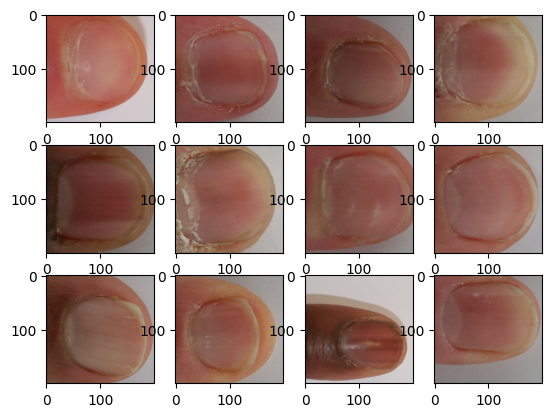

In [52]:
fig, axs = plt.subplots(3,4)

cnt = 0
for i in range(3):
    for j in range(4):
        img = cv2.resize(images[cnt], (IMG_SIZE,IMG_SIZE))
        axs[i,j].imshow(view(img))
        cnt += 1

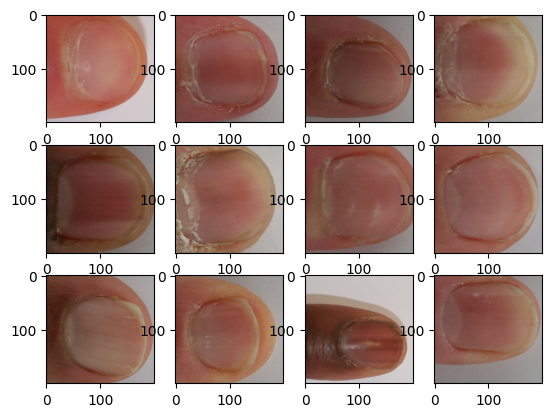

In [53]:
fig, axs = plt.subplots(3,4)

cnt = 0
for i in range(3):
    for j in range(4):
        img = cv2.resize(images[cnt], (IMG_SIZE,IMG_SIZE))
        axs[i,j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        cnt += 1

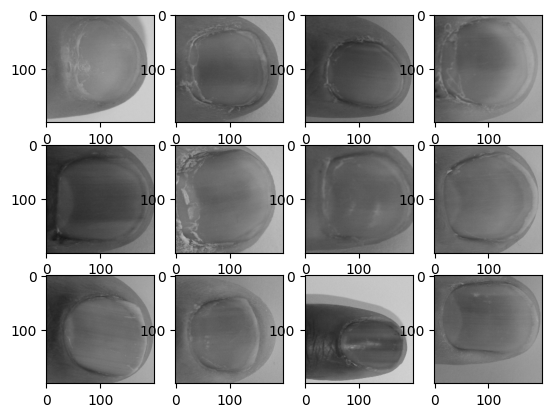

In [54]:
fig, axs = plt.subplots(3,4)

cnt = 0
for i in range(3):
    for j in range(4):
        img = cv2.resize(images[cnt], (IMG_SIZE,IMG_SIZE))
        grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        axs[i,j].imshow(cv2.cvtColor(grey, cv2.COLOR_BGR2RGB))
        cnt += 1

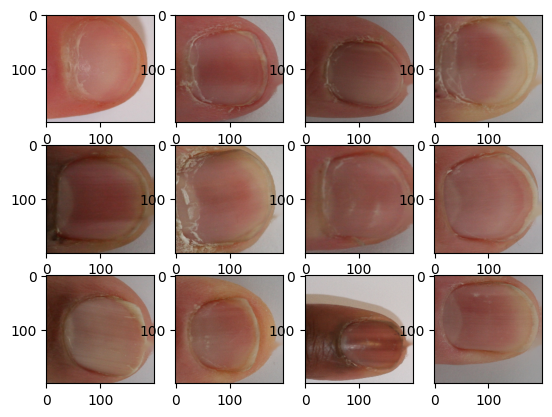

In [55]:
fig, axs = plt.subplots(3,4)

cnt = 0
for i in range(3):
    for j in range(4):
        img = cv2.resize(images[cnt], (IMG_SIZE,IMG_SIZE))
        mask = cv2.threshold(grey, 155, 255, cv2.THRESH_BINARY)[1]
        new_img = cv2.inpaint(img, mask, 4, cv2.INPAINT_TELEA)
        axs[i,j].imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
        cnt += 1

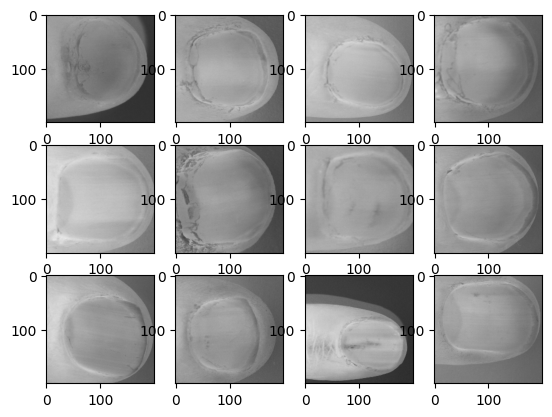

In [64]:
fig, axs = plt.subplots(3,4)

cnt = 0
for i in range(3):
    for j in range(4):
        img = cv2.resize(images[cnt], (IMG_SIZE,IMG_SIZE))
        grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        inverted_grey = 255 - grey
        axs[i,j].imshow(cv2.cvtColor(inverted_grey, cv2.COLOR_BGR2RGB))
        cnt += 1

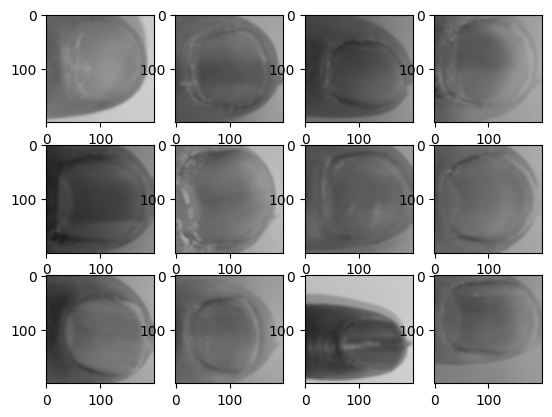

In [58]:
fig, axs = plt.subplots(3,4)

cnt = 0
for i in range(3):
    for j in range(4):
        img = cv2.resize(images[cnt], (IMG_SIZE,IMG_SIZE))
        new_img = cv2.inpaint(img, mask, 4, cv2.INPAINT_TELEA)
        gaussian_blur = cv2.GaussianBlur(cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY), (11,11), 0)
        axs[i,j].imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
        cnt += 1

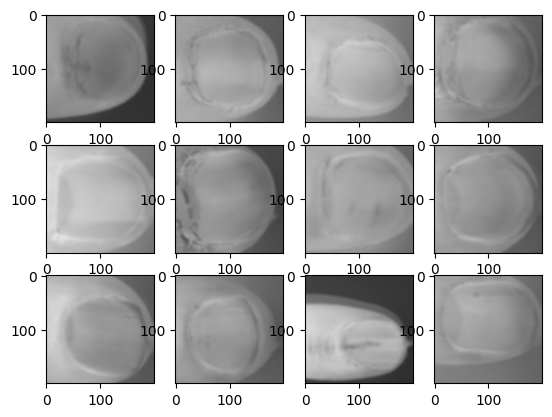

In [60]:
fig, axs = plt.subplots(3,4)

cnt = 0
for i in range(3):
    for j in range(4):
        img = cv2.resize(images[cnt], (IMG_SIZE,IMG_SIZE))
        new_img = cv2.inpaint(img, mask, 4, cv2.INPAINT_TELEA)
        gaussian_blur = cv2.GaussianBlur(cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY), (11,11), 0)
        inverted_blur = 255 - gaussian_blur
        axs[i,j].imshow(cv2.cvtColor(inverted_blur, cv2.COLOR_BGR2RGB))
        cnt += 1

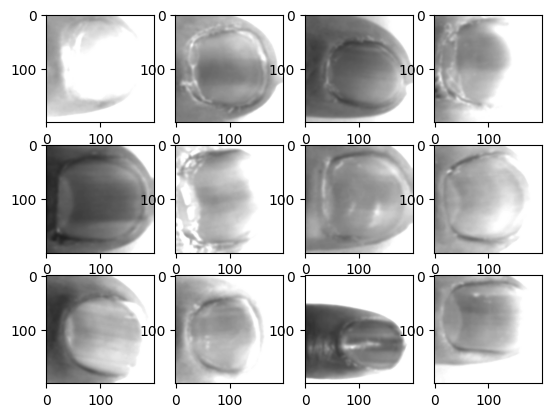

In [61]:
fig, axs = plt.subplots(3,4)

cnt = 0
for i in range(3):
    for j in range(4):
        img = cv2.resize(images[cnt], (IMG_SIZE,IMG_SIZE))
        new_img = cv2.inpaint(img, mask, 4, cv2.INPAINT_TELEA)
        gaussian_blur = cv2.GaussianBlur(cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY), (11,11), 0)
        inverted_blur = 255 - gaussian_blur
        sketch = cv2.divide(gaussian_blur, inverted_blur, scale = 256)
        axs[i,j].imshow(cv2.cvtColor(sketch, cv2.COLOR_BGR2RGB))
        cnt += 1

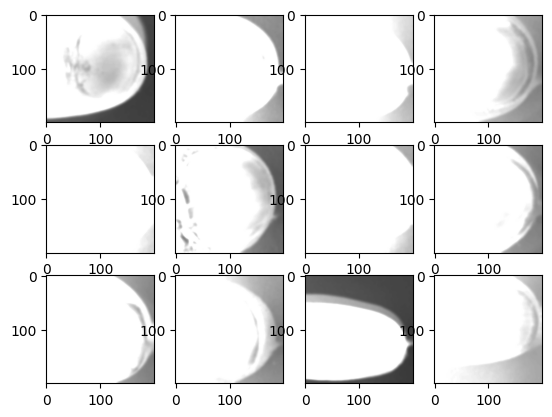

In [62]:
fig, axs = plt.subplots(3,4)

cnt = 0
for i in range(3):
    for j in range(4):
        img = cv2.resize(images[cnt], (IMG_SIZE,IMG_SIZE))
        new_img = cv2.inpaint(img, mask, 4, cv2.INPAINT_TELEA)
        gaussian_blur = cv2.GaussianBlur(cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY), (11,11), 0)
        inverted_blur = 255 - gaussian_blur
        sketch = cv2.divide(gaussian_blur, inverted_blur, scale = 256)
        inverted_sketch = cv2.divide(inverted_blur, gaussian_blur, scale = 256)
        axs[i,j].imshow(cv2.cvtColor(inverted_sketch, cv2.COLOR_BGR2RGB))
        cnt += 1

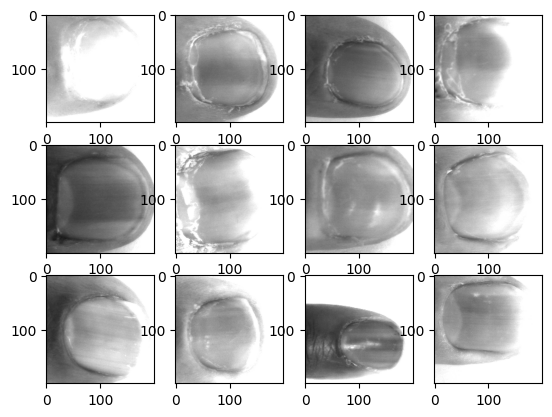

In [66]:
fig, axs = plt.subplots(3,4)

cnt = 0
for i in range(3):
    for j in range(4):
        img = cv2.resize(images[cnt], (IMG_SIZE,IMG_SIZE))
        grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        inverted_grey = 255 - grey
        inv_grey_blur = cv2.GaussianBlur(inverted_grey, (15,15),0)
        pencil_sketch = cv2.divide(grey, inv_grey_blur, scale = 256)
        axs[i,j].imshow(cv2.cvtColor(pencil_sketch, cv2.COLOR_BGR2RGB))
        cnt += 1

RESIZING THE IMAGES

In [ ]:
images = []
labels = []

In [ ]:
#Resizing the images of the dataset
def prepare_Images(label,path):
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img_res=cv2.resize(img,(224,224),None,0.25,0.25)
    img_array = img_to_array(img_res)
    img_array = img_array/255.0
    images.append(img_array)
    labels.append(str(label))

In [ ]:
id = '001'
path = os.path.join('/content/gdrive/My Drive/D3','{}.jpg'.format(id))
# path = folder_path + '/' + format(id) + '.jpg'
# print(path)
img = cv2.imread(path, cv2.IMREAD_COLOR)
# print(img)
img_res=cv2.resize(img,(224,224),None,0.25,0.25)
img_array = img_to_array(img_res)
img_array = img_array/255.0

In [ ]:
# path = folder_path + '/' + format(id) + '.jpg'
# path

In [ ]:
uploaded = files.upload()
train_Data = neha.read_csv(io.BytesIO(uploaded['train.csv']))
print(train_Data.head)

Saving train.csv to train (4).csv
<bound method NDFrame.head of      id  calcium
0     1        0
1     2        0
2     3        0
3     4        0
4     5        1
..  ...      ...
88  175        0
89  177        0
90  178        0
91  179        0
92  185        0

[93 rows x 2 columns]>


In [ ]:
id_Data = train_Data['id']
calcium_Data = train_Data['calcium']

In [ ]:
k = 0
for id,calcium in tqdm(zip(id_Data,calcium_Data)):
    id = str(id)
    n = len(id)
    if(n == 1):
      id = '00' + id
    elif(n == 2):
      id = '0' + id
    path = os.path.join('/content/gdrive/My Drive/D3','{}.jpg'.format(id))
    # print(path)
    prepare_Images(calcium,path)

93it [00:00, 132.57it/s]


PADDING 

In [ ]:
# # Find the largest dimensions of the images in the array
max_height = np.max([img.shape[0] for img in images])
max_width = np.max([img.shape[1] for img in images])

 # Find the smallest dimensions of the images in the array
min_height = np.min([img.shape[0] for img in images])
min_width = np.min([img.shape[1] for img in images])

# Calculate the amount of padding required on each side
top_pad = int((max_height - min_height) / 2)
bottom_pad = max_height - min_height - top_pad
left_pad = int((max_width - min_width) / 2)
right_pad = max_width - min_width - left_pad

# Print the amount of padding required on each side
print('Top padding:', top_pad)
print('Right padding:', right_pad)
print('Bottom padding:', bottom_pad)
print('Left padding:', left_pad)

Top padding: 237
Right padding: 238
Bottom padding: 238
Left padding: 237


CONVERTING LIST TO NUMPY ARRAYS

In [ ]:
# import numpy as np
# images=np.array(images)
# labels=np.array(labels)
images = np.array(images)
label_arr = np.array(labels)

CONVERTING INTO PIXEL ARRAY

In [ ]:
# assume your array of images is stored in a variable called 'image_array'
# this variable should be a list of file paths or a list of NumPy arrays

# # create an empty list to store the pixels for each image
pixel_array = []

# # iterate over the images in the array
for image_path_or_array in images:

     # if the image is a file path, load it with OpenCV
     if isinstance(image_path_or_array, str):
         image = cv2.imread(image_path_or_array, cv2.IMREAD_GRAYSCALE)
     # otherwise, assume it's a NumPy array
     else:
         image = image_path_or_array

     # get the pixel data as a flat array of integers
     pixel_data = np.ravel(image)

     # add the pixel data to the output array
     pixel_array.append(pixel_data)

 # the 'pixel_array' variable now contains a list of pixel arrays, one for each image

     pixel_array

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,label_arr,stratify=label_arr,test_size=0.10,random_state=44)

In [ ]:
from keras.utils import np_utils
y_train= np_utils.to_categorical(y_train, num_classes=2)
y_test = np_utils.to_categorical(y_test, num_classes=2)

In [ ]:
print(len(labels), len(images))

93 93


NORMALIZING THE IMAGES ARRAY DATASET

In [ ]:
# # Normalize the array of images to be between 0 and 1
normalized_images = []
for image in pixel_array:
     normalized_image = cv2.normalize(image.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
     normalized_images.append(normalized_image)

In [ ]:
normalized_images = np.array(normalized_images)
# labels=np.array(labels)
normalized_images

array([array([[0.17857143],
              [0.26530612],
              [0.66836735],
              ...,
              [0.89285714],
              [0.88265306],
              [0.91326531]]), array([[0.24852071],
                                     [0.27218935],
                                     [0.69230769],
                                     ...,
                                     [0.78106509],
                                     [0.78106509],
                                     [0.78106509]]),
       array([[0.23417722],
              [0.29113924],
              [0.56329114],
              ...,
              [0.84810127],
              [0.83544304],
              [0.87341772]]), array([[0.26900585],
                                     [0.32748538],
                                     [0.60233918],
                                     ...,
                                     [0.84210526],
                                     [0.84210526],
                                   

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
# import tensorflow
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam', metrics=['accuracy'])
# model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1)

In [ ]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 4s 1s/step - loss: 0.3791 - accuracy: 0.8554
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 0.3736 - accuracy: 0.8193
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 0.4008 - accuracy: 0.8554
Epoch 4/30
3/3 [==============================] - 3s 1s/step - loss: 0.4240 - accuracy: 0.8072
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 0.4685 - accuracy: 0.7711
Epoch 6/30
3/3 [==============================] - 4s 2s/step - loss: 0.3519 - accuracy: 0.8554
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 0.5460 - accuracy: 0.6867
Epoch 8/30
3/3 [==============================] - 3s 1s/step - loss: 0.4409 - accuracy: 0.8313
Epoch 9/30
3/3 [==============================] - 3s 1s/step - loss: 0.4370 - accuracy: 0.7952
Epoch 10/30
3/3 [==============================] - 5s 2s/step - loss: 0.4020 - accuracy: 0.7831
Epoch 11/30
3/3 [==============================] 

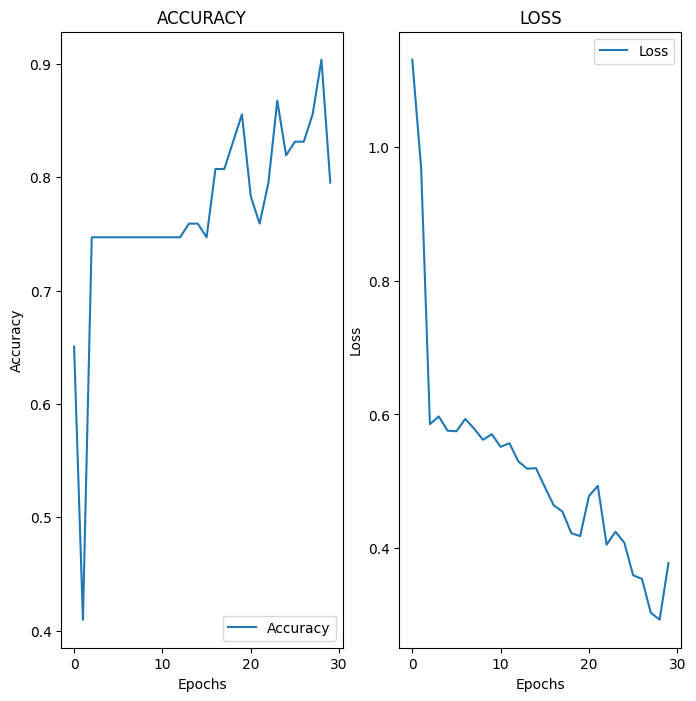

In [ ]:
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']
# print(max(acc))

loss = model.history.history['loss']
EPOCHS = 30

epochs_range = range(EPOCHS)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Loss')
plt.legend(loc='upper right')
plt.title('LOSS')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [ ]:
from keras.models import load_model
model.save('model.h5')

In [ ]:
loaded_model = load_model('model.h5')

In [14]:
d = {0 : 'Calcium Efficient', 1 : 'Calcium Deficiency Detected'}

1/1 [==============================] - 1s 887ms/step


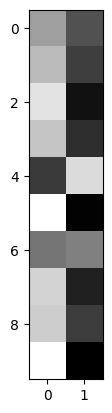

In [ ]:
predictions = model.predict(x_test)
predictions
plt.imshow(predictions, cmap='gray')
plt.show()

In [15]:
def predict_class(path, model):
    IMG_SIZE_LOAD = 224
    xtest = np.zeros((1, 224, 224, 3))
    image = cv2.imread(path)
    image = cv2.resize(image, (IMG_SIZE_LOAD, IMG_SIZE_LOAD))
    x_test_array = tf.keras.preprocessing.image.img_to_array(image)
    xtest[0] = x_test_array
    xtest = xtest / 255.0
    preds = model.predict(xtest)
    print(preds)
    l = preds[0]
    ind = np.where(l == max(l))[0][0]
    print(np.where(l == max(l))[0][0])
    print(d[ind])

In [16]:
path = '/content/gdrive/My Drive/D3/035.jpg'
predict_class(path, loaded_model)

1/1 [==============================] - 0s 69ms/step
[[9.999975e-01 7.999785e-07]]
0
Calcium Efficient
